# Statistics 

### 1.1 Part 1: Calculating Morning and Evening Peak Proportions

#### *1. Create a data frame with station as the index and two columns, one for the AM peak count and one for the PM peak count.*

Importing Pandas, Matplotlib, Numpy and Seaborn libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plte
import numpy as np
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

We first read the hourlyExits.csv file, and store it under the dataframe `exits`. The hourlyExits.csv dataset shows the exits from the London underground stations from 2017.

In [2]:
# Reading the hourlyExits.csv file, and making the Station column the index
exits = pd.read_csv('hourlyExits.csv', index_col = 'Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


We make a copy of the `exits` dataframe, and store this copy under `peak_counts` (this way we don't alter our original dataframe). 

* The morning peak hours ( `AM_peak` ) include the hours H07, H08 and H09. 
* The afternoon peak hours ( `PM_peak` ) include the hours H16, H17 and H18.

We add the hours for each respective peak category to get a total for both categories, and store these `AM_peak` & `PM_peak` totals under the `peak_counts` dataframe, with `Station` as the index.

In [3]:
# Making a copy of the exits 
peak_counts = exits.copy()
peak_counts

# Below we are just adding the total hours in each peak times together
peak_counts['AM_peak'] = peak_counts['H07'] + peak_counts['H08'] + peak_counts['H09']
peak_counts['PM_peak'] = peak_counts['H16'] + peak_counts['H17'] + peak_counts['H18']

# Below prints the peak times, in AM and PM
peak_counts = peak_counts[['AM_peak', 'PM_peak']]
peak_counts

,AM_peak,PM_peak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


#### *2. Using the total exits for each station to create further columns:*
> a. The AM peak count as a proportion of the dailytotal for the station

> b. The PM peakcount as a proportion of the dailytotal for the station

> c. The difference between the AM and PM peaks proportions

> d. The ratio between the AM and PM peaks proportions

We sum up the total amount of exits for each station (notice that we use the `exits` dataframe as the `peak_counts` dataframe only includes the peak hours).

We then create a new dataframe, named `totals`, and assigned the `total_sum_of_rows` data to it.

Finally, we join the `totals` dataframe to the `peak_counts` dataframe, and store these combined dataframes under `peak_counts_and_totals`. Now we can see the total peak morning exits, total peak afternoon exits, and total daily exits.

In [4]:
# summing the total amount of exits for each station
total_sum_of_rows = exits.apply(sum, axis=1) 

totals = pd.DataFrame().assign(TotalExits = total_sum_of_rows)

peak_counts_and_totals = peak_counts.join(totals)
peak_counts_and_totals

,AM_peak,PM_peak,TotalExits
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


#### Creating the further columns: 

We can add the additional columns by adding the title and calculation of each column to the `peak_counts_and_totals` dataframe. The cell below displays how to do this for the AM peak count as a proportion of the daily total.

In [5]:
# a. The AM peak count as a proportion of the dailytotal for the station
peak_counts_and_totals['AM_prop_of_total'] = peak_counts_and_totals['AM_peak'] / peak_counts_and_totals['TotalExits']
peak_counts_and_totals

,AM_peak,PM_peak,TotalExits,AM_prop_of_total
Station,,,,
Acton Town,1970,2628,9362,0.210425
Aldgate,7408,2992,16136,0.459098
Aldgate East,7618,3803,21206,0.359238
Alperton,856,1847,5118,0.167253
Amersham,424,1465,3905,0.108579
...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789
Wood Green,2165,6494,18989,0.114013
Wood Lane,1798,1766,6610,0.272012


We do the same for the 3 remaining columns to be added:

In [6]:
# b. The PM peak count as a proportion of the dailytotal for the station
peak_counts_and_totals['PM_prop_of_total'] = peak_counts_and_totals['PM_peak'] / peak_counts_and_totals['TotalExits']
peak_counts_and_totals

# c. The difference between the AM and PM peaks proportions
peak_counts_and_totals['Difference_in_Proportion'] = peak_counts_and_totals['AM_prop_of_total'] - peak_counts_and_totals['PM_prop_of_total']
peak_counts_and_totals

# d. The ratio between the AM and PM peaks proportions
peak_counts_and_totals['Ratio_between_AM_PM'] = peak_counts_and_totals['AM_prop_of_total'] / peak_counts_and_totals['PM_prop_of_total']
peak_counts_and_totals

,AM_peak,PM_peak,TotalExits,AM_prop_of_total,PM_prop_of_total,Difference_in_Proportion,Ratio_between_AM_PM
Station,,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,-0.070284,0.749619
Aldgate,7408,2992,16136,0.459098,0.185424,0.273674,2.475936
Aldgate East,7618,3803,21206,0.359238,0.179336,0.179902,2.003155
Alperton,856,1847,5118,0.167253,0.360883,-0.193630,0.463454
Amersham,424,1465,3905,0.108579,0.375160,-0.266581,0.289420
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,-0.187197,0.446140
Wood Green,2165,6494,18989,0.114013,0.341987,-0.227974,0.333385
Wood Lane,1798,1766,6610,0.272012,0.267171,0.004841,1.018120


We now have the `peak_counts_and_totals` dataframe which holds:
- Total morning peak hours `AM_peak` ;
- Total afternoon peak hours `PM_peak`;
- Total number of exits for each station `TotalExits` ;
- Morning peak count as a proportion of the daily total `AM_prop_of_total` ; 
- Afternoon peak count as a proportion of the daily total `PM_prop_of_total` ;
- Difference between the morning and afternoon peak proportions `Difference_in_Proportion` ;
- Ratio between the morning and afternoon peak proportoins `Ratio_between_AM_PM` .

### 1.2 Part 2: Plotting and Analysing Distributions

#### *1. Plotting histograms of the proportions and generating the statistics of the distributions.*

We plot histograms for each of the data using the `hist()` function.

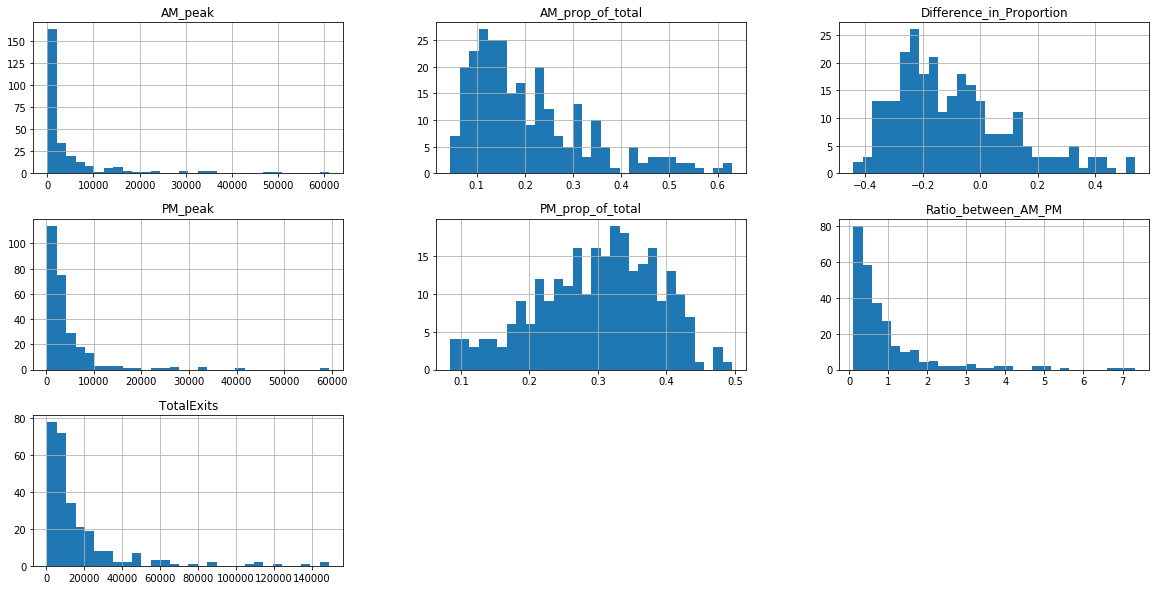

In [7]:
hist_of_proportions = peak_counts_and_totals.hist(bins=30, figsize=(20,10))

We use the `describe()` function to generate the statistics of the distributions:

In [8]:
peak_counts_and_totals.describe()

,AM_peak,PM_peak,TotalExits,AM_prop_of_total,PM_prop_of_total,Difference_in_Proportion,Ratio_between_AM_PM
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750,-0.091618,0.966229
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724,0.203932,1.148915
min,27.000000,239.000000,596.000000,0.045302,0.084630,-0.440373,0.108634
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947,-0.242542,0.327530
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397,-0.139068,0.555720
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596,0.014010,1.050702
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079,0.539649,7.325050


#### *2. Reviewing and commenting on what the results of Step 1 show about travel patterns*


* **The AM peak count as a proportion of the daily total** : The data ranges from 0.045302 to 0.630427, thus is a fairly wide range of amount of exits in the morning. From the histogram, we can see that the AM peak count as a proportion of the daily total has a positive skew, with a median of 0.169378 and upper-quartile of 0.266443. This suggests that the number of exits in the peak morning hours are higher amongst a high frequency of stations, so there are a lot of stations that people travel to in the morning. 

* **The PM peak count as a proportion of the daily total** : The data ranges from 0.084630 to 0.496079, which isn't as wide of a range as the AM peak count as a proportion of the daily total, suggesting the number of exits was spread out amongst less stations in the afternoon. The histogram shows an almost symmetric, and hence, a normal distribution, as the shape of the graph resemebles a bell curve. The mean is 0.298750, and the median is 0.307397, which are almost the same. This suggests that the proportion of exits in the peak afternoon were more evenly distributed, in comparison to the AM peak count as a proportion of the daily total. This is supported by the y axes, which goes up to 27-28 on the AM_prop_of_total table, whereas on the PM_prop_of_total graph, it goes up to only about 18-19. 

* **The difference between the AM and PM peak proportions** : This histogram has a positive skew, with the median being -0.139068. The histogram shows that as there is a higher frequency of stations with a negative value on the x axis (the difference in proportion), more people exit the station in their residential area, in other words, in the peak afternoon, in comparison to the morning exits. This could be due to the fact that London is home to a wide variety of industries, thus thousands travel from all around the city (e.g. from more residential areas) into more central London in the morning for work. To summarise, in the afternoon, the spread of exits is over a wider range of stations, as opposed to the stations in the morning, that are not spread out as much (majority tend to be situated in the city centre).

* **The ratio between the AM and PM peak proportions** : Finally, this histogram also has a positive skew, which also happens to be the strongest skew out of them all. The ratio ranges from 0.108634 to 7.325050, and where there is a higher number of exits in the peak morning (as a proportion of the daily total) in comparison to the peak afternoon, the ratio is higher. We can see that the median ratio between the AM and PM peak proportions is 0.555720, with almost 140 stations having a ratio below this figure. This makes sense as there are more stations situated outside of Central London, and thus there is more of a likelihood of there to be a higher proportion of exits in the afternoon in comparison to the morning, as people are returning to their residential areas. As the ratios increase, the frequency of stations starts to decrease, and this makes sense due to the fact that there are not as many stations in Central London in comparison to the outer-city stations. 

### 1.3 Part 3: A Simple Classification of Stations

#### *Classifying stations into mainly 'work', mainly 'residential' and 'other'. The classes are to be defined as follows:*
1. *Work: have (significantly) ‘more’ exits in the AM peak than in the PM peak*
2. *Residential: have (significantly) ‘more’exits in the PM peak than in the AM peak*
3. *Other: the number exits in the AM and PM peaks are approximately equal*

A new dataframe `diff_in_prop` has been created below, which shows the difference between the AM and PM peaks proportions. Choosing this dataframe allows us to categorise the classes by locating the stations that are within a certain threshold. 

When the difference in proportion is a positive value, then the proportion of peak morning exits exceeds the proportion of peak afternoon exits. On the other hand, when the difference in proportion is a negative value, the proportion of peak afternoon exits exceeds the proportion of peak morning exits. 

Once each class has been defined, they are stored in the dataframe `classes`, which has sorted each station into one of three categories of their main uses: *work, residential, or other*.

In [9]:
diff_in_prop = (peak_counts_and_totals['AM_prop_of_total'] - peak_counts_and_totals['PM_prop_of_total']).copy()
work = diff_in_prop.loc[(diff_in_prop > 0.05)]
residential = diff_in_prop.loc[(diff_in_prop < -0.1)]
other = diff_in_prop.loc[(diff_in_prop >= -0.1) & (diff_in_prop <= 0.05)]

classes = {'Work' : work, 'Residential' : residential, 'Other' : other}
classes = pd.DataFrame(classes)
classes = classes.fillna(value='Station not mainly used for this category')
classes

,Work,Residential,Other
Acton Town,Station not mainly used for this category,Station not mainly used for this category,-0.0702841
Aldgate,0.273674,Station not mainly used for this category,Station not mainly used for this category
Aldgate East,0.179902,Station not mainly used for this category,Station not mainly used for this category
Alperton,Station not mainly used for this category,-0.19363,Station not mainly used for this category
Amersham,Station not mainly used for this category,-0.266581,Station not mainly used for this category
...,...,...,...
Wimbledon Park,Station not mainly used for this category,-0.187197,Station not mainly used for this category
Wood Green,Station not mainly used for this category,-0.227974,Station not mainly used for this category
Wood Lane,Station not mainly used for this category,Station not mainly used for this category,0.00484115
Woodford,Station not mainly used for this category,-0.332394,Station not mainly used for this category


#### See below the plots for the work, residential, and other classes:

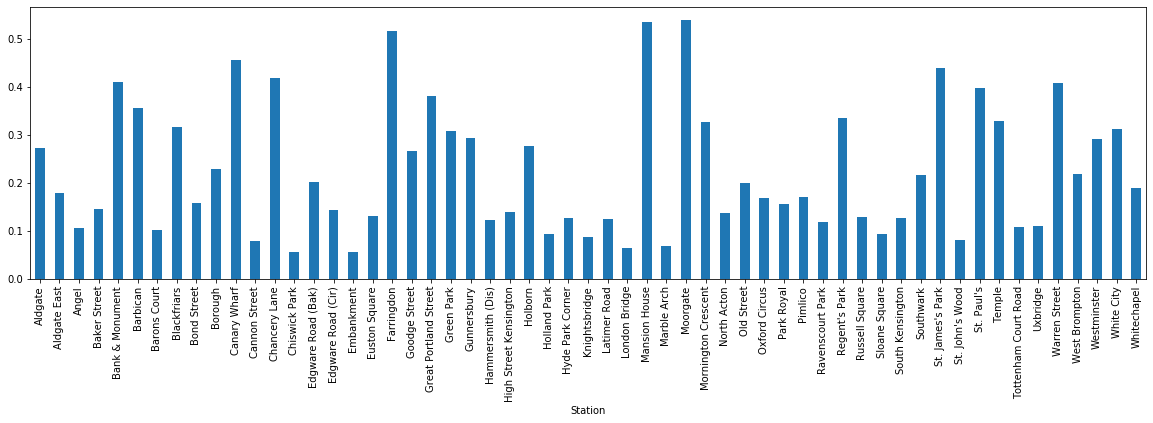

In [10]:
work_plot = work.plot(kind='bar', figsize=(20,5))

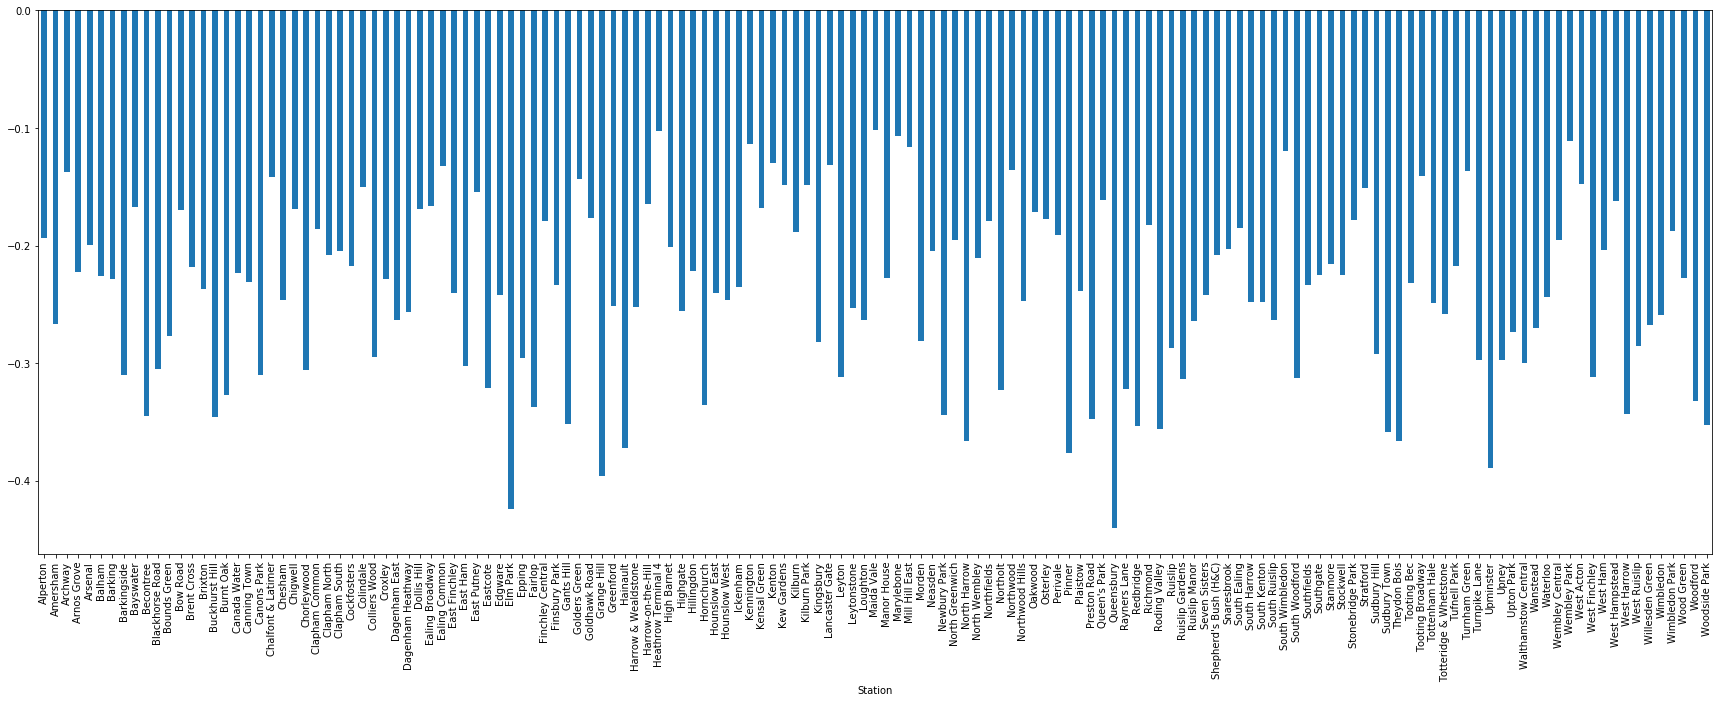

In [11]:
residential_plot = residential.plot(kind='bar', figsize=(30,10))

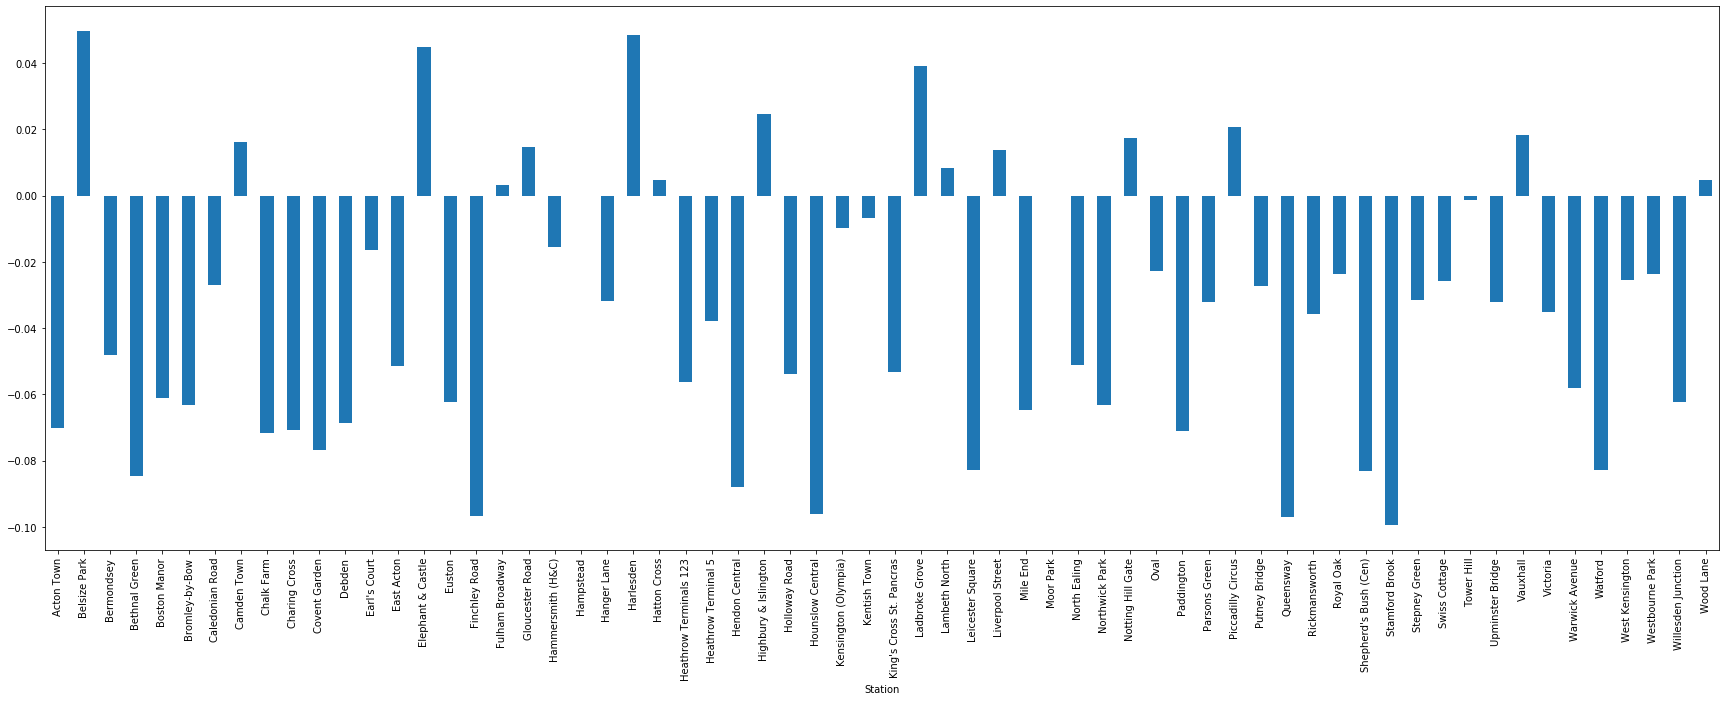

In [12]:
other_plot = other.plot(kind='bar', figsize=(30,10))

The thresholds that have been chosen depict the stations that fit mostly in the named category, so for example, in the work category, the threshold is `diff_in_prop > 0.05` which selects the stations that tend to be more in the city centre, and are used as work destinations. Notice that the thresholds are not symmetric around 0.0. These thresholds have been chosen due to the fact that the range over the AM peak count as a proportion of the daily total is greater than the PM peak count as a proportion of the daily total. Therefore, `diff_in_prop > 0.05` has been chosen for the 'work' class as it is more inclusive of wider range between the minimum and maximum value. On the other hand, `diff_in_prop < -0.1` has been chosen for the 'residential' class as the range between the maximum and minimum value isn't as large. 

The class `other` involves a threshold which is in between `work` and `residential` , which includes stations such as Covent Garden and Leicester Square, so can account for reasons such as tourism, and also stations that are heavily used as connections to other lines, for instance King's Cross St Pancras.

#### *Reporting the classification of the Northern Line stations*

To assess the classification of stations, we have selected some of the stations on the Northern Line, and located them within the `classes` dataframe. 

In [13]:
northern_line = classes.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 
                 'Leicester Square', 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]
northern_line

,Work,Residential,Other
Archway,Station not mainly used for this category,-0.137496,Station not mainly used for this category
Balham,Station not mainly used for this category,-0.225868,Station not mainly used for this category
Embankment,0.0551493,Station not mainly used for this category,Station not mainly used for this category
Goodge Street,0.267223,Station not mainly used for this category,Station not mainly used for this category
Highgate,Station not mainly used for this category,-0.25524,Station not mainly used for this category
High Barnet,Station not mainly used for this category,-0.200935,Station not mainly used for this category
Leicester Square,Station not mainly used for this category,Station not mainly used for this category,-0.0829565
Morden,Station not mainly used for this category,-0.280931,Station not mainly used for this category
South Wimbledon,Station not mainly used for this category,-0.119911,Station not mainly used for this category
Tottenham Court Road,0.10878,Station not mainly used for this category,Station not mainly used for this category


The results of `northern_line` are as expected, as High Barnet, for example, is at the end of the line, hence residential, Embankment is closer to the city centre, hence part of the work class, and Leicester Square is part of neither the work nor residential classes, hence it is part of other (such as for tourism).